In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

In [16]:
def load_json(fname):
    with open(fname) as f:
        df = pd.DataFrame(json.load(f))
    return df

In [51]:
def compare(o1, o2="results/baseline.json", name1="L2O", name2="Adam Baseline"):

    df1 = load_json(o1)
    df2 = load_json(o2)

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    axs[0][0].plot(np.log(df1["loss"]), label=name1)
    axs[0][0].plot(np.log(df2["loss"]), label=name2)
    axs[0][0].legend()
    axs[0][0].set_title("Log training loss per epoch")

    axs[0][1].plot(df1["val_loss"], label=name1)
    axs[0][1].plot(df2["val_loss"], label=name2)
    axs[0][1].legend()
    axs[0][1].set_title("Validation loss per epoch")

    axs[1][0].plot(df1["epoch_time"], np.log(df1["loss"]), label=name1)
    axs[1][0].plot(df2["epoch_time"], np.log(df2["loss"]), label=name2)
    axs[1][0].legend()
    axs[1][0].set_title("Log training loss over time")

    axs[1][1].plot(df1["epoch_time"], df1["val_loss"], label=name1)
    axs[1][1].plot(df2["epoch_time"], df2["val_loss"], label=name2)
    axs[1][1].legend()
    axs[1][1].set_title("Validation loss over time")

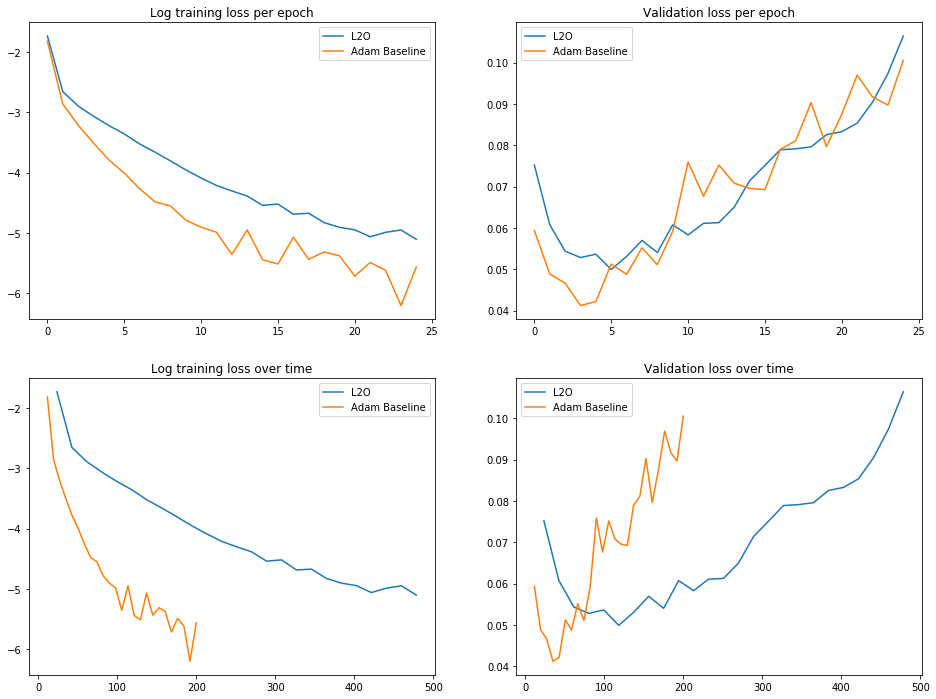

In [52]:
compare("results/weights_imitation_1t_32b/stage_2/period_19.json")

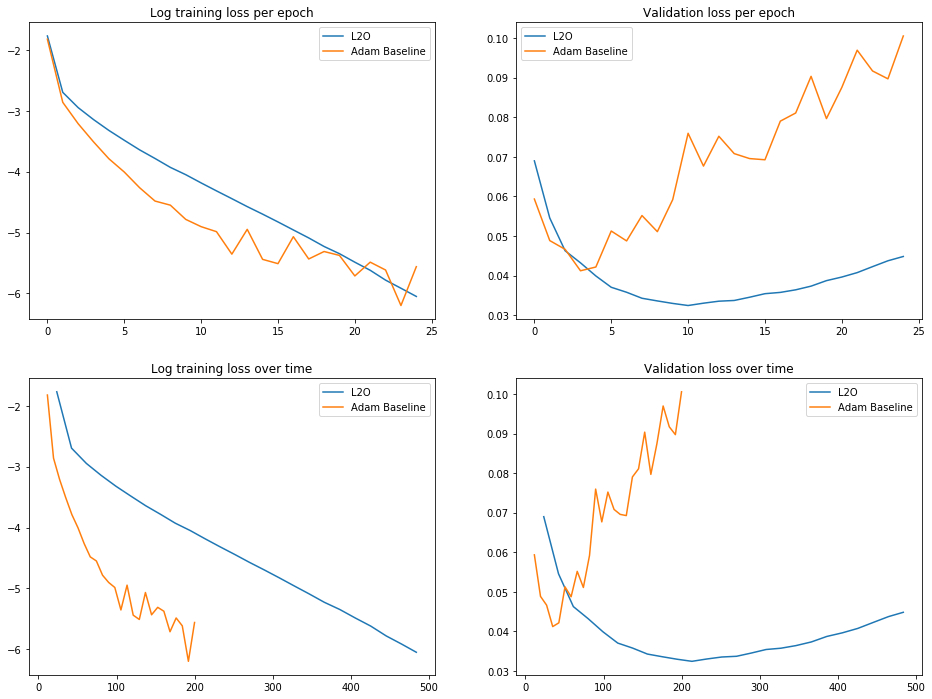

In [53]:
compare("results/weights_imitation_1t_64b/stage_2/period_19.json")

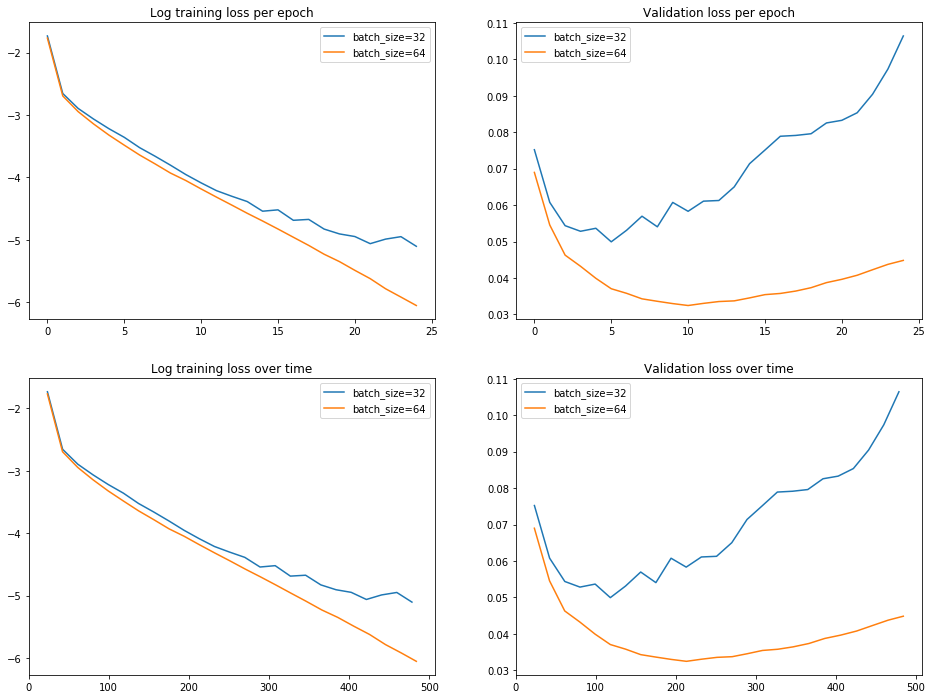

In [54]:
compare("results/weights_imitation_1t_32b/stage_2/period_19.json", "results/weights_imitation_1t_64b/stage_2/period_19.json", name1="batch_size=32", name2="batch_size=64")